In [108]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
event = pd.read_csv('Event_entry.csv')
event = event.loc[:, ~event.columns.str.contains('^Unnamed')]

In [110]:
event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 9 columns):
Entry            869 non-null int64
TicketClass      869 non-null int64
Sex              869 non-null object
Age              694 non-null float64
Price            869 non-null int64
Order            869 non-null int64
Name             869 non-null object
Ticket Number    869 non-null int64
Bank Balance     869 non-null int64
dtypes: float64(1), int64(6), object(2)
memory usage: 61.2+ KB


### 1. Data Exploration and Visualization

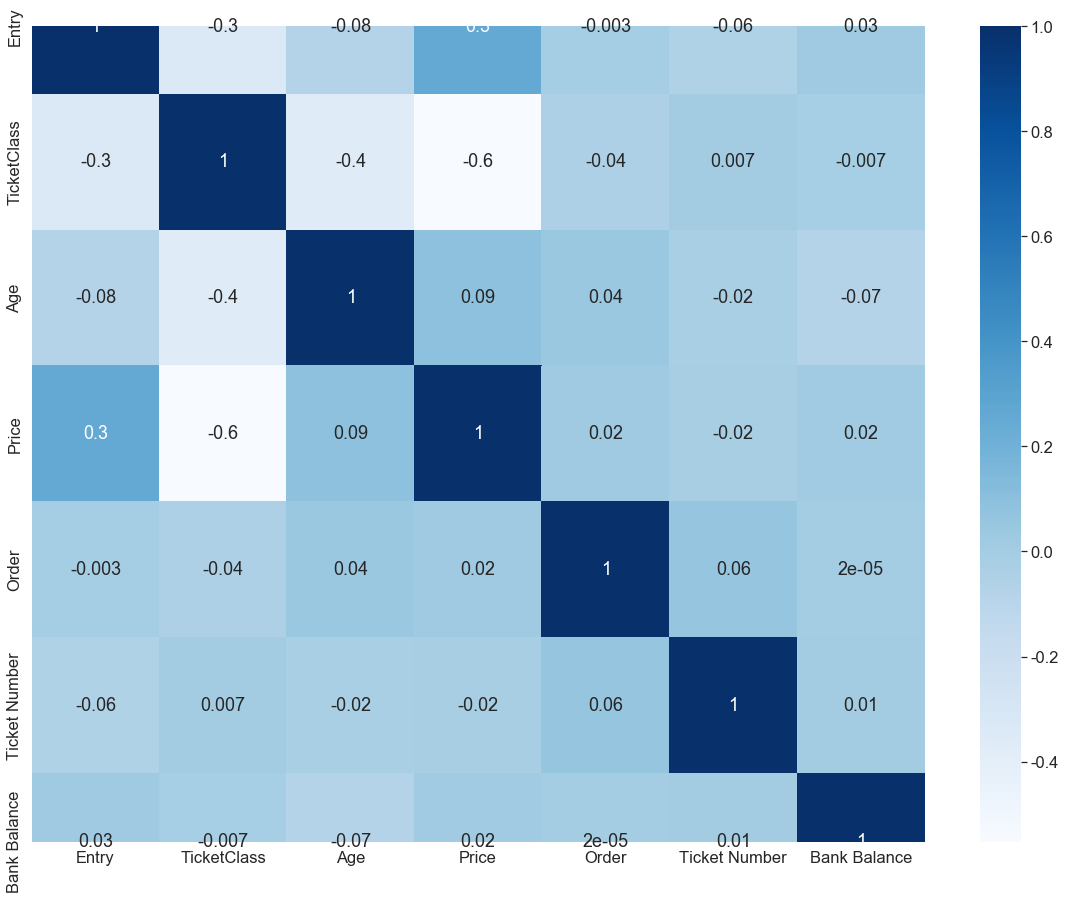

In [111]:
#Finding correlation of all the variables
plt.figure(figsize=(20,15))
sns.set(font_scale=1.5)
sns.heatmap(data=event.corr(),annot=True,cmap='Blues',fmt='.1g')

plt.show()

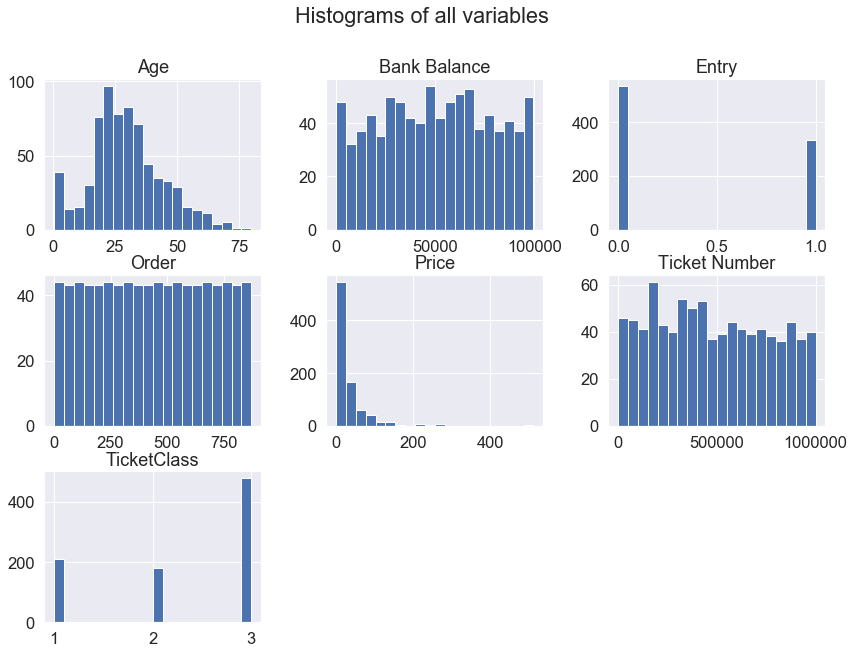

In [112]:
# Plot histograms
event.hist(bins=20, figsize=(14,10))
plt.suptitle('Histograms of all variables')

plt.show()

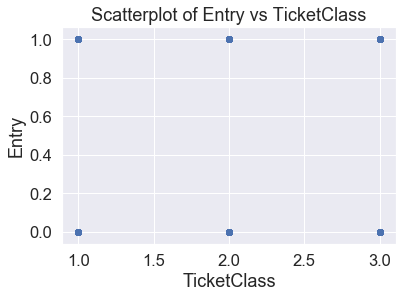

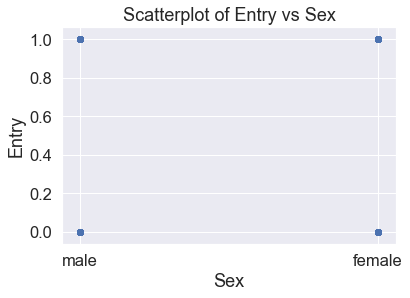

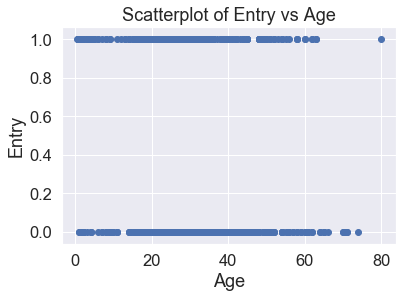

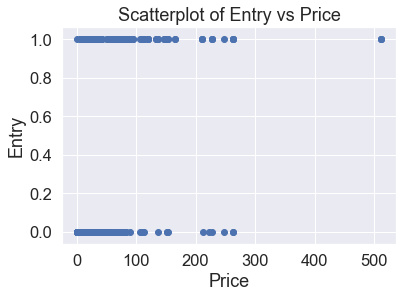

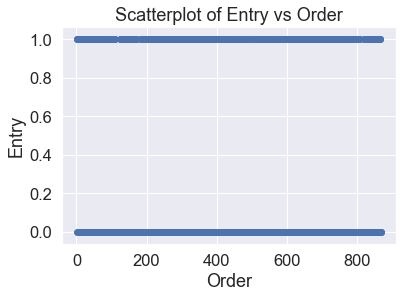

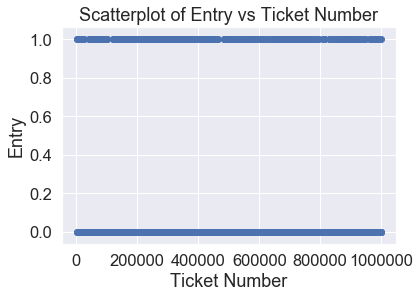

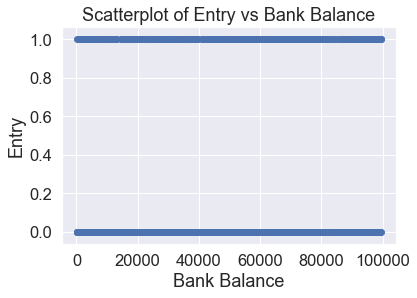

In [113]:
# scatterplots
attributes = ['TicketClass', 'Sex', 'Age', 'Price', 'Order',
              'Ticket Number', 'Bank Balance']

for x_var in attributes:
    plt.scatter(event[x_var], event['Entry'])
    plt.title(f'Scatterplot of Entry vs {x_var}')
    plt.xlabel(x_var)
    plt.ylabel('Entry')
    plt.show()

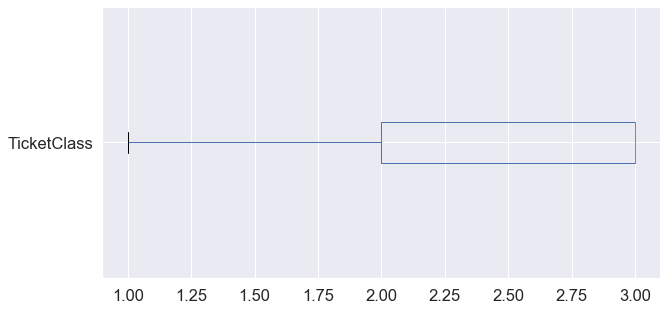

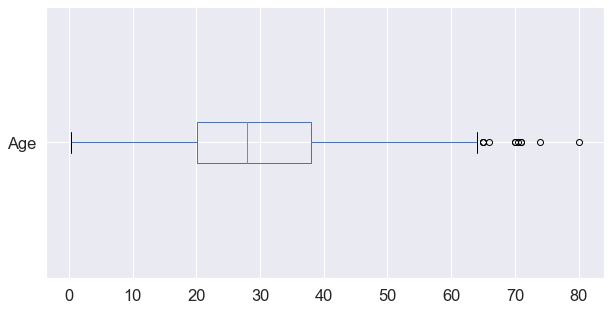

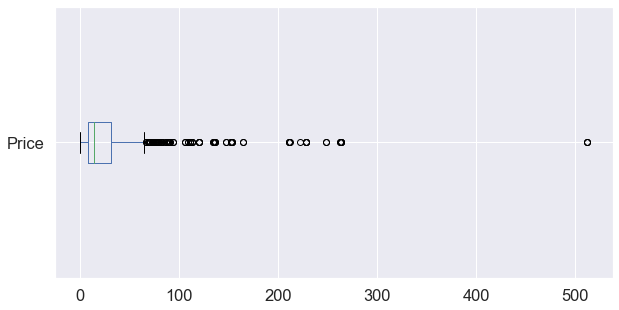

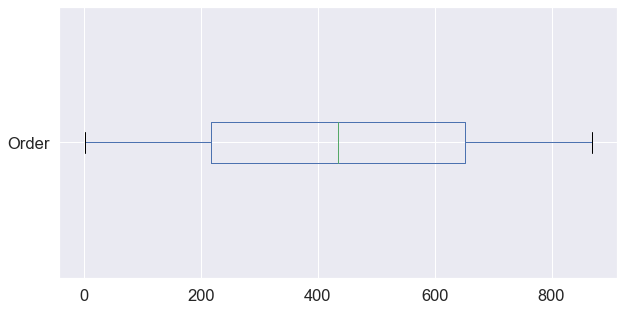

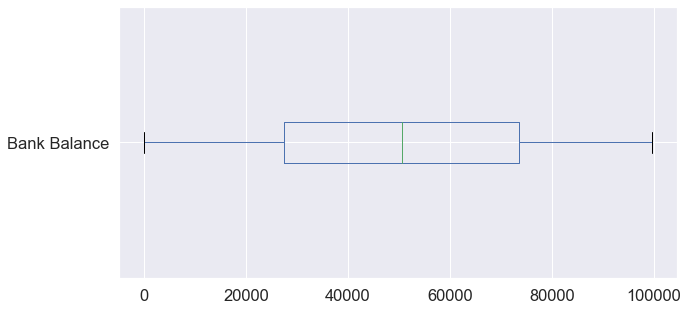

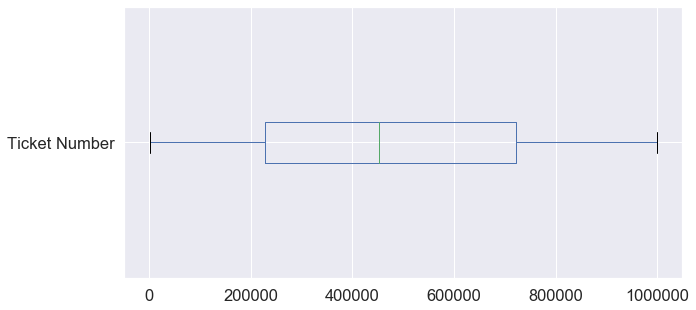

In [114]:
# boxplot
attributes = ['TicketClass', 'Age', 'Price', 'Order', 'Bank Balance', 'Ticket Number']

for i in attributes:
    plt.figure(figsize=(10, 5))
    event.boxplot(column=i, vert=False)
    plt.show()

#### Interpretation:
- The heatmap does not show too much information since there are not too much correlation among the variables.
- The barcharts tell us the distribution of the variables. We can see that there is a lot of cheaper tickets. We can also see there are a lot of younger audience in the dataset.
- The scatterplots do not tell us much in this case since the y variable is binary.
- The boxplots again shows the distrubution of the variables. We can see that price has a lot of outliers not within the box and the tails. 

### 2. PCA Analysis

In [115]:
event.head()

,Entry,TicketClass,Sex,Age,Price,Order,Name,Ticket Number,Bank Balance
0,0,3,male,22.0,7,1,"Braund, Mr. Owen Harris",648155,74389
1,1,1,female,38.0,71,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",119239,94932
2,1,3,female,26.0,8,3,"Heikkinen, Miss. Laina",411408,26146
3,1,1,female,35.0,53,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",530093,35627
4,0,3,male,35.0,8,5,"Allen, Mr. William Henry",510583,60457


In [116]:
# remove unnecessary columns
columns_to_remove = ['Name', 'Ticket Number']
event = event.drop(columns=columns_to_remove)

In [117]:
# see if there are null values
nulls = event.isnull().sum()
print(nulls)

Entry             0
TicketClass       0
Sex               0
Age             175
Price             0
Order             0
Bank Balance      0
dtype: int64


In [118]:
# Handle missing values
event = event.fillna({'Age':event['Age'].mean()})
nulls = event.isnull().sum()

print(nulls)

Entry           0
TicketClass     0
Sex             0
Age             0
Price           0
Order           0
Bank Balance    0
dtype: int64


In [119]:
from sklearn.preprocessing import LabelEncoder

# create labels for column 'sex' with 0 = female, 1 = male
lbl = LabelEncoder()
lbl.fit(list(event['Sex'].values))
event['Sex'] = lbl.transform(list(event['Sex'].values))

In [120]:
# use make dummy variables for 'ticketclass'
event = pd.get_dummies(event, columns=['TicketClass'], prefix='Ticket')

In [121]:
event.head()

,Entry,Sex,Age,Price,Order,Bank Balance,Ticket_1,Ticket_2,Ticket_3
0,0,1,22.0,7,1,74389,0,0,1
1,1,0,38.0,71,2,94932,1,0,0
2,1,0,26.0,8,3,26146,0,0,1
3,1,0,35.0,53,4,35627,1,0,0
4,0,1,35.0,8,5,60457,0,0,1


In [122]:
event.dtypes

Entry             int64
Sex               int64
Age             float64
Price             int64
Order             int64
Bank Balance      int64
Ticket_1          uint8
Ticket_2          uint8
Ticket_3          uint8
dtype: object

- Here, I remove unnecessary columns such as 'Name' and 'Ticket Number', which most likely does not mean anything to entry status and has no pattern.
- Then, I handle missing values for the column 'age' by using the average age to fill.
- Next, I use label encoding for the column 'sex' and use 0 to represent females and 1 for males.
- Finally, I make dummy variables for 'TicketClass'

In [123]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Scale the data
ms = MinMaxScaler()
scaled_data = ms.fit_transform(event)
scaled_df = pd.DataFrame(scaled_data, columns=event.columns)  # Ensure columns are correctly assigned

In [124]:
scaled_df.head()

,Entry,Sex,Age,Price,Order,Bank Balance,Ticket_1,Ticket_2,Ticket_3
0,0.0,1.0,0.271174,0.013672,0.000000,0.746993,0.0,0.0,1.0
1,1.0,0.0,0.472229,0.138672,0.001152,0.953580,1.0,0.0,0.0
2,1.0,0.0,0.321438,0.015625,0.002304,0.261846,0.0,0.0,1.0
3,1.0,0.0,0.434531,0.103516,0.003456,0.357190,1.0,0.0,0.0
4,0.0,1.0,0.434531,0.015625,0.004608,0.606889,0.0,0.0,1.0


In [125]:
# perform train test split
from sklearn.model_selection import train_test_split

X = scaled_df.drop(['Entry'], axis=1)
y = scaled_df['Entry']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [126]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

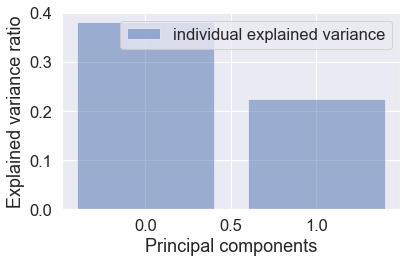

In [127]:
explained_variance=pca.explained_variance_ratio_

plt.figure(figsize=(6, 4))

plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center',
        label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [128]:
explained_variance[0]+explained_variance[1]

0.6051067437934234

In [129]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import mean_squared_error, r2_score

model = LogisticRegressionCV()
model.fit(X_train_pca, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [130]:
from math import sqrt
pca_preds=model.predict(X_test_pca)
rmse_2 = sqrt(mean_squared_error(y_test,pca_preds))

print('MSE: ', mean_squared_error(y_test,pca_preds))
print('RMSE: ', rmse_2)

MSE:  0.3505747126436782
RMSE:  0.59209349991676


In [131]:
r2_score(y_test, pca_preds)

-0.40900039824770995

In [133]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pca_preds)

0.6494252873563219

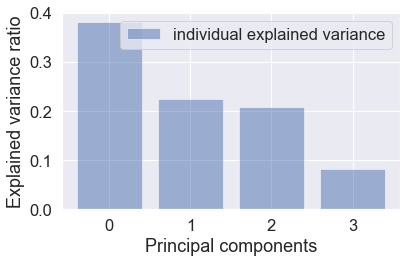

In [134]:
# n = 4
pca = PCA(n_components = 4)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

explained_variance=pca.explained_variance_ratio_

plt.figure(figsize=(6, 4))

plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center',
        label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [135]:
# mse and rmse for n = 4
model = LogisticRegressionCV()
model.fit(X_train_pca, y_train)
pca_preds=model.predict(X_test_pca)
rmse_4 = sqrt(mean_squared_error(y_test,pca_preds))

print('MSE: ', mean_squared_error(y_test,pca_preds))
print('RMSE: ', rmse_4)

MSE:  0.25862068965517243
RMSE:  0.5085476277156078


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [136]:
# r-squared for n = 4
r2_score(y_test, pca_preds)

-0.03942652329749108

In [137]:
# accuracy score
accuracy_score(y_test, pca_preds)

0.7413793103448276

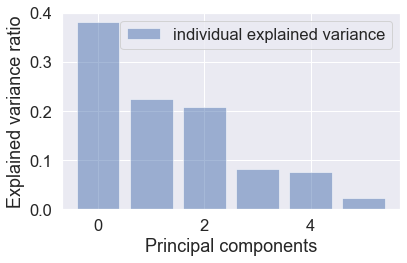

In [138]:
# mse and rmse for n = 6
pca = PCA(n_components = 6)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

explained_variance=pca.explained_variance_ratio_

plt.figure(figsize=(6, 4))

plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center',
        label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [139]:
# mse for n = 6
model = LogisticRegressionCV()
model.fit(X_train_pca, y_train)
pca_preds=model.predict(X_test_pca)
rmse_6 = sqrt(mean_squared_error(y_test,pca_preds))

print('MSE: ', mean_squared_error(y_test,pca_preds))
print('RMSE: ', rmse_6)

MSE:  0.23563218390804597
RMSE:  0.48541959571905


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [140]:
# r-squared for n = 6
r2_score(y_test, pca_preds)

0.05296694544006375

In [141]:
# accuracy score
accuracy_score(y_test, pca_preds)

0.764367816091954

In [151]:
# Compare the OOS performance with that of a LASSO Logistic Regression Model
from sklearn.linear_model import ElasticNet, Lasso, LassoCV, BayesianRidge, LassoLarsIC
from sklearn.preprocessing import StandardScaler


X = event.drop(['Entry'], axis=1)
y = event['Entry']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


#Scaling the X values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Creating the lambda test values
alphas = np.logspace(-6, 0, 100)

#Creating 5 folds
k = 5
n = len(y_train)

#Shuffling the data
indices = np.arange(n)
np.random.shuffle(indices)

X_cv = X_train_scaled[indices]
y_cv = y_train.iloc[indices]

avg_rmse=[]
for alpha in alphas:
    rmse_list = []
    
    # Manual k-fold splitting
    for fold in range(k):
        # Calculating the size of each fold
        fold_size = n // k
        
        # Define the start and end indices of the test set
        start, end = fold * fold_size, (fold + 1) * fold_size
        
        test_indices = indices[start:end]
        train_indices = np.concatenate((indices[:start], indices[end:]))
        
        X_train_cv, X_test_cv = X_cv[train_indices], X_cv[test_indices]
        y_train_cv, y_test_cv = y_cv.iloc[train_indices], y_cv.iloc[test_indices]
        
        lasso = Lasso(alpha=alpha)
        
        lasso.fit(X_train_cv, y_train_cv)
        
        y_pred_cv = lasso.predict(X_test_cv)
        rmse = np.sqrt(mean_squared_error(y_test_cv, y_pred_cv))
        
        rmse_list.append(rmse)
        
    avg_rmse.append(np.mean(rmse_list))

#Finding the best alpha
best_alpha = alphas[np.argmin(avg_rmse)]
print(f"Best alpha: {best_alpha}")

lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train_scaled, y_train)

y_pred = lasso.predict(X_test_scaled)

rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"The R-sqaure is {r2} and the rmse is {rmse}")

Best alpha: 0.004977023564332114
The R-sqaure is 0.3565208410199149 and the rmse is 0.40013079611930785


#### Intepretation:
Looking at the accuracy score of all the PCA models, we can see that the model with 6 dimensions performs the best out of all PCA models with 76.4% of accuracy.

However, looking at the out of sample performance, we can see that the Lasso Regression model still has the lowest RMSE value at 0.4, which predicts the actual value better than all of the PCA models.
- The PCA model with 2 dimensions has a RMSE of 0.592
- The PCA model with 4 dimensions has a RMSE of 0.509
- The PCA model with 6 dimensions has a RMSE of 0.485


### 3. Decision Tree Analysis

In [146]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree

In [147]:
# transfomed data
X = scaled_df.drop(['Entry'], axis=1)
y = scaled_df['Entry']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [148]:
model = tree.DecisionTreeClassifier(max_depth=3) 
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)

rmse = sqrt(mse)

print('MSE: ', mse)
print('RMSE: ', rmse)

MSE:  0.19540229885057472
RMSE:  0.4420433223684922


In [149]:
# accuracy score
accuracy_score(y_test, predictions)

0.8045977011494253

#### Intepretation:
- We can see that MSE and RMSE are lower than the ones of all PCA models above.
- The low MSE and RMSE indicate that the prediction model is pretty consistent and close to the test data.
- In other words, the predictions of this model are close to the actual values.
- The accuracy score of this model is pretty high at 80.46%.

[Text(167.4, 190.26, 'X[0] <= 0.5\ngini = 0.463\nsamples = 695\nvalue = [442, 253]'),
 Text(83.7, 135.9, 'X[7] <= 0.5\ngini = 0.392\nsamples = 235\nvalue = [63, 172]'),
 Text(41.85, 81.53999999999999, 'X[1] <= 0.026\ngini = 0.13\nsamples = 129\nvalue = [9, 120]'),
 Text(20.925, 27.180000000000007, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.118\nsamples = 127\nvalue = [8, 119]'),
 Text(125.55000000000001, 81.53999999999999, 'X[2] <= 0.048\ngini = 0.5\nsamples = 106\nvalue = [54, 52]'),
 Text(104.625, 27.180000000000007, 'gini = 0.492\nsamples = 89\nvalue = [39, 50]'),
 Text(146.475, 27.180000000000007, 'gini = 0.208\nsamples = 17\nvalue = [15, 2]'),
 Text(251.10000000000002, 135.9, 'X[1] <= 0.158\ngini = 0.29\nsamples = 460\nvalue = [379, 81]'),
 Text(209.25, 81.53999999999999, 'X[7] <= 0.5\ngini = 0.48\nsamples = 30\nvalue = [12, 18]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 T

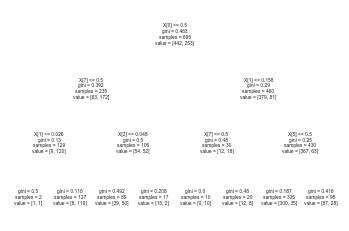

In [150]:
tree.plot_tree(model)

### 4. K Means Clustering

In [99]:
# keep only age and price
columns_to_keep = ['Age', 'Price']
event_4 = event[columns_to_keep].dropna()
event_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 869 entries, 0 to 868
Data columns (total 2 columns):
Age      869 non-null float64
Price    869 non-null int64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [100]:
from sklearn.cluster import KMeans

# Scale the data
ms = MinMaxScaler()
scaled_data = ms.fit_transform(event_4)
scaled_df = pd.DataFrame(scaled_data, columns=event_4.columns)

In [101]:
# Perform K-Means Clustering with different values of K,, k = 2
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(scaled_df)

scaled_df['Cluster'] = kmeans.labels_
scaled_df['Cluster'].value_counts()

1    666
0    203
Name: Cluster, dtype: int64

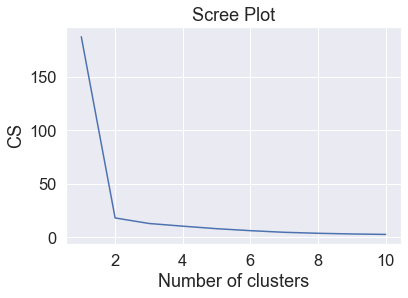

In [81]:
cs = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled_df)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs)
plt.title('Scree Plot')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [90]:
# Perform K-Means Clustering with different values of K, k = 3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_df)

scaled_df['Cluster'] = kmeans.labels_
scaled_df['Cluster'].value_counts()

0    495
1    203
2    171
Name: Cluster, dtype: int64

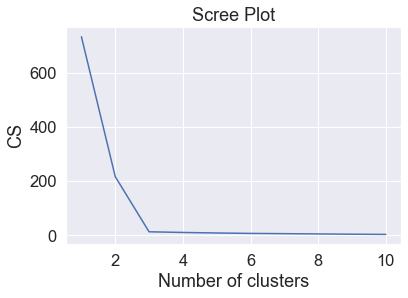

In [91]:
cs = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled_df)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs)
plt.title('Scree Plot')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [92]:
# Perform K-Means Clustering with different values of K, k = 4
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled_df)

scaled_df['Cluster'] = kmeans.labels_
scaled_df['Cluster'].value_counts()

0    495
1    183
2    171
3     20
Name: Cluster, dtype: int64

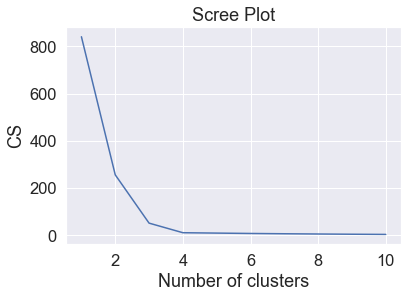

In [93]:
cs = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled_df)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs)
plt.title('Scree Plot')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [94]:
# Perform K-Means Clustering with different values of K, k = 5
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(scaled_df)

scaled_df['Cluster'] = kmeans.labels_
scaled_df['Cluster'].value_counts()

1    495
2    171
4    123
0     60
3     20
Name: Cluster, dtype: int64

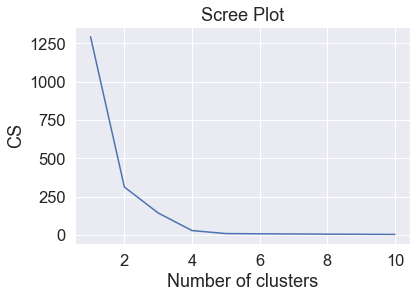

In [95]:
cs = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled_df)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs)
plt.title('Scree Plot')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [96]:
# Perform K-Means Clustering with different values of K, k = 6
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(scaled_df)

scaled_df['Cluster'] = kmeans.labels_
scaled_df['Cluster'].value_counts()

1    495
2    154
0    123
3     60
4     20
5     17
Name: Cluster, dtype: int64

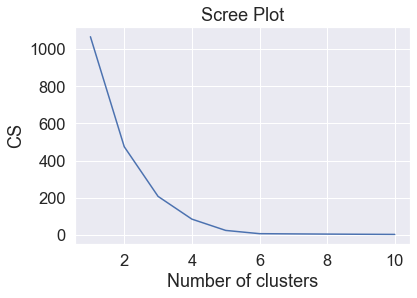

In [97]:
# choose the optimal number of clusters
cs = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled_df)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs)
plt.title('Scree Plot')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

After performing K means clustering for different values of K and ploting scree plots, We can see that the elbow happened the most at K = 2 across all plots. Thus, we find that the optimal K value is 2 clusters.

In [102]:
# Perform K-Means Clustering with different values of K,, k = 2
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(scaled_df)

scaled_df['Cluster'] = kmeans.labels_
scaled_df['Cluster'].value_counts()

1    666
0    203
Name: Cluster, dtype: int64

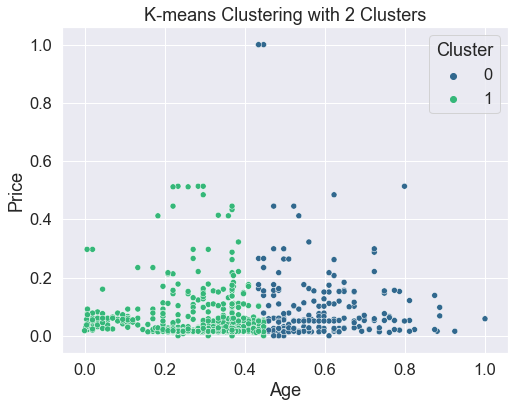

In [103]:
# plot graph to show different clusters
scaled_df['Cluster'] = scaled_df['Cluster'].astype('category')

fig, axes = plt.subplots(figsize=(8, 6))

sns.scatterplot(x='Age', y='Price', data=scaled_df, hue='Cluster', palette='viridis')
plt.title('K-means Clustering with 2 Clusters')
plt.show()

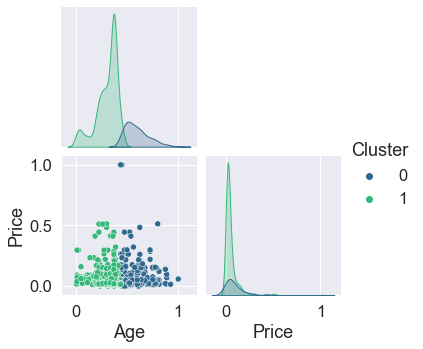

In [89]:
# Create the pairplot
sns.pairplot(scaled_df, hue='Cluster', palette='viridis', corner=True)
plt.show()

In [104]:
from sklearn.metrics import silhouette_score
silhouette_score(scaled_df.iloc[:,:4], kmeans.labels_)

0.8547241043974616

#### Intepretation:
We can see the 2 clusters from the scatterplot. And K=2 has a pretty high silhouette score at 0.85, indicating this is a well defined clustering.